In [ ]:
x = 10
print(x)

10


In [ ]:
x = 2

# Neste ponto, mudei x para 2 só para testar

* topico 1
* topico 2

$\lambda$

In [ ]:
print(x)

2


# Comandos básicos de pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/Salaries.csv')

In [ ]:
df.head(5)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     397 non-null    int64 
 1   rank           397 non-null    object
 2   discipline     397 non-null    object
 3   yrs.since.phd  397 non-null    int64 
 4   yrs.service    397 non-null    int64 
 5   sex            397 non-null    object
 6   salary         397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


In [ ]:
df.shape

(397, 7)

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [ ]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.00,397.00,397.00
mean,22.31,17.61,113706.46
std,12.89,13.01,30289.04
min,1.00,0.00,57800.00
25%,12.00,7.00,91000.00
50%,21.00,16.00,107300.00
75%,32.00,27.00,134185.00
max,56.00,60.00,231545.00


In [ ]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

In [ ]:
# Será que homens e mulheres tem salários diferentes?
# Forma nro 1: dividir a base em duas e fazer um describe em cada uma delas
df_homens   = df[df['sex'] == 'Male']
df_mulheres = df[df['sex'] == 'Female']

In [ ]:
df_homens.describe()

,yrs.since.phd,yrs.service,salary
count,358.00,358.00,358.00
mean,22.95,18.27,115090.42
std,13.04,13.23,30436.93
min,1.00,0.00,57800.00
25%,12.00,7.00,92000.00
50%,22.00,18.00,108043.00
75%,33.00,27.00,134863.75
max,56.00,60.00,231545.00


In [ ]:
df_mulheres.describe()

,yrs.since.phd,yrs.service,salary
count,39.00,39.00,39.00
mean,16.51,11.56,101002.41
std,9.78,8.81,25952.13
min,2.00,0.00,62884.00
25%,10.00,4.00,77250.00
50%,17.00,10.00,103750.00
75%,23.50,17.50,117002.50
max,39.00,36.00,161101.00


In [ ]:
df_homens['salary'].mean()

115090.41899441341

In [ ]:
df_mulheres['salary'].mean()

101002.41025641025

In [ ]:
# median, mode, std, 
df_homens['discipline'].mode()

0    B
dtype: object

In [ ]:
df_mulheres['discipline'].mode()

0    B
dtype: object

In [ ]:
df['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

In [ ]:
df.groupby('sex').describe().T

sex                     Female       Male
yrs.since.phd count      39.00     358.00
              mean       16.51      22.95
              std         9.78      13.04
              min         2.00       1.00
              25%        10.00      12.00
              50%        17.00      22.00
              75%        23.50      33.00
              max        39.00      56.00
yrs.service   count      39.00     358.00
              mean       11.56      18.27
              std         8.81      13.23
              min         0.00       0.00
              25%         4.00       7.00
              50%        10.00      18.00
              75%        17.50      27.00
              max        36.00      60.00
salary        count      39.00     358.00
              mean   101002.41  115090.42
              std     25952.13   30436.93
              min     62884.00   57800.00
              25%     77250.00   92000.00
              50%    103750.00  108043.00
              75%    117002.50  134863.75
              max    161101.00  231545.00

In [ ]:
df.groupby(['rank', 'sex']).describe().T

rank                 AssocProf             AsstProf                 Prof  \
sex                     Female       Male    Female      Male     Female   
yrs.since.phd count      10.00      54.00     11.00     56.00      18.00   
              mean       15.50      15.44      5.64      5.00      23.72   
              std         5.80      10.25      2.98      2.46       7.67   
              min        10.00       6.00      2.00      1.00      12.00   
              25%        12.00       9.25      3.50      3.75      17.25   
              50%        13.00      11.50      5.00      4.00      23.00   
              75%        17.75      17.00      7.50      7.00      28.00   
              max        26.00      49.00     11.00     11.00      39.00   
yrs.service   count      10.00      54.00     11.00     56.00      18.00   
              mean       11.50      12.04      2.55      2.34      17.11   
              std         6.26      10.70      1.86      1.43       8.10   
              min         6.00       1.00      0.00      0.00       0.00   
              25%         8.00       7.00      1.50      1.00      14.00   
              50%         9.50       8.00      3.00      3.00      17.00   
              75%        10.75      11.00      3.00      3.00      19.00   
              max        24.00      53.00      6.00      5.00      36.00   
salary        count      10.00      54.00     11.00     56.00      18.00   
              mean    88512.80   94869.70  78049.91  81311.46  121967.61   
              std     17965.29   12890.82   9372.00   7901.34   19619.58   
              min     62884.00   70000.00  63100.00  63900.00   90450.00   
              25%     73682.50   83213.25  73000.00  74375.00  109723.00   
              50%     90556.50   95626.50  77000.00  80182.00  120257.50   
              75%    103933.00  104630.25  79362.50  88802.50  135000.00   
              max    109650.00  126431.00  97032.00  95079.00  161101.00   

rank                            
sex                       Male  
yrs.since.phd count     248.00  
              mean       28.63  
              std        10.20  
              min        11.00  
              25%        20.00  
              50%        28.00  
              75%        37.00  
              max        56.00  
yrs.service   count     248.00  
              mean       23.23  
              std        11.71  
              min         2.00  
              25%        15.00  
              50%        22.00  
              75%        31.00  
              max        60.00  
salary        count     248.00  
              mean   127120.82  
              std     28213.81  
              min     57800.00  
              25%    105834.50  
              50%    123996.00  
              75%    145512.50  
              max    231545.00

In [ ]:
df['yrs.since.phd'].describe()

count    397.00
mean      22.31
std       12.89
min        1.00
25%       12.00
50%       21.00
75%       32.00
max       56.00
Name: yrs.since.phd, dtype: float64

In [ ]:
faixas = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
df['fx_tempo_doutorado'] = pd.cut(df['yrs.since.phd'], faixas)

In [ ]:
df.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary,fx_tempo_doutorado
0,Prof,B,19,18,Male,139750,"(15, 20]"
1,Prof,B,20,16,Male,173200,"(15, 20]"
2,AsstProf,B,4,3,Male,79750,"(0, 5]"
3,Prof,B,45,39,Male,115000,"(40, 45]"
4,Prof,B,40,41,Male,141500,"(35, 40]"


In [ ]:
df['fx_tempo_doutorado'].value_counts()

(15, 20]    54
(10, 15]    52
(25, 30]    47
(20, 25]    46
(5, 10]     45
(0, 5]      42
(35, 40]    41
(30, 35]    35
(40, 45]    20
(45, 50]    10
(50, 55]     3
(55, 60]     2
Name: fx_tempo_doutorado, dtype: int64

In [ ]:
df.groupby('fx_tempo_doutorado').describe().T

fx_tempo_doutorado     (0, 5]    (5, 10]   (10, 15]   (15, 20]   (20, 25]  \
yrs.since.phd count     42.00      45.00      52.00      54.00      46.00   
              mean       3.43       8.24      12.90      18.20      22.85   
              std        1.17       1.32       1.38       1.42       1.44   
              min        1.00       6.00      11.00      16.00      21.00   
              25%        3.00       7.00      12.00      17.00      22.00   
              50%        4.00       8.00      13.00      18.00      23.00   
              75%        4.00       9.00      14.00      19.00      24.00   
              max        5.00      10.00      15.00      20.00      25.00   
yrs.service   count     42.00      45.00      52.00      54.00      46.00   
              mean       1.93       5.22       8.44      13.39      17.04   
              std        1.44       2.49       3.70       5.45       6.21   
              min        0.00       1.00       0.00       2.00       2.00   
              25%        1.00       3.00       7.00       9.25      15.00   
              50%        2.00       5.00       9.00      15.50      19.00   
              75%        3.00       7.00      11.00      18.00      21.75   
              max        5.00      10.00      18.00      23.00      25.00   
salary        count     42.00      45.00      52.00      54.00      46.00   
              mean   81695.00   87459.62  106745.29  120196.48  126099.59   
              std     8626.35   12310.31   19161.58   24147.99   27076.45   
              min    63900.00   63100.00   71065.00   81285.00   62884.00   
              25%    73625.00   77081.00   98326.50  104606.50  105991.00   
              50%    80225.00   86373.00  106690.50  121050.00  119110.50   
              75%    89942.00   97032.00  118342.25  135445.50  146175.00   
              max    95079.00  113600.00  146000.00  173200.00  181257.00   

fx_tempo_doutorado    (25, 30]   (30, 35]   (35, 40]   (40, 45]   (45, 50]  \
yrs.since.phd count      47.00      35.00      41.00      20.00      10.00   
              mean       28.13      32.80      38.15      43.05      47.50   
              std         1.28       1.53       1.28       1.54       1.43   
              min        26.00      31.00      36.00      41.00      46.00   
              25%        27.00      31.00      37.00      42.00      46.00   
              50%        28.00      33.00      38.00      43.00      47.50   
              75%        29.00      34.00      39.00      45.00      49.00   
              max        30.00      35.00      40.00      45.00      49.00   
yrs.service   count      47.00      35.00      41.00      20.00      10.00   
              mean       22.28      27.20      32.02      35.05      46.40   
              std         6.07       6.32       7.78       8.96       6.17   
              min         7.00       7.00       9.00      18.00      40.00   
              25%        19.00      25.00      27.00      26.75      43.25   
              50%        23.00      30.00      36.00      39.00      44.50   
              75%        27.00      31.00      38.00      43.00      48.25   
              max        36.00      35.00      41.00      45.00      60.00   
salary        count      47.00      35.00      41.00      20.00      10.00   
              mean   128993.21  130869.20  125836.32  130958.40  100412.30   
              std     30887.30   28054.81   29091.13   33171.78   38665.21   
              min     73300.00   89565.00   87800.00   70700.00   67559.00   
              25%    105825.00  110567.50  103450.00  106266.75   78351.50   
              50%    126621.00  128464.00  119450.00  133458.50   89179.50   
              75%    150250.00  150470.00  141500.00  147083.25   97950.00   
              max    204000.00  189409.00  231545.00  205500.00  192253.00   

fx_tempo_doutorado    (50, 55]   (55, 60]  
yrs.since.phd count       3.00       2.00  
              mean       52.33     

In [ ]:
df.groupby('fx_tempo_doutorado').agg({'salary':['count','mean','min','max']}).style.format()

In [ ]:
df = pd.read_csv('https://jpbarddal.github.io/assets/data/datascience/ans/dataset0.csv')

In [ ]:
df.head(5)

,x,y
0,55.38,97.18
1,51.54,96.03
2,46.15,94.49
3,42.82,91.41
4,40.77,88.33


In [ ]:
df.describe()

,x,y
count,142.00,142.00
mean,54.26,47.83
std,16.77,26.94
min,22.31,2.95
25%,44.10,25.29
50%,53.33,46.03
75%,64.74,68.53
max,98.21,99.49


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

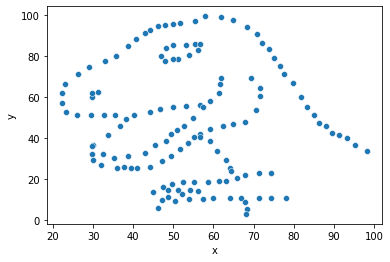

In [ ]:
import seaborn as sns
sns.scatterplot(df['x'], df['y'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


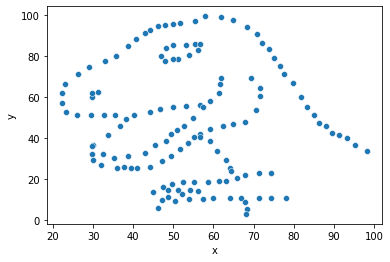

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


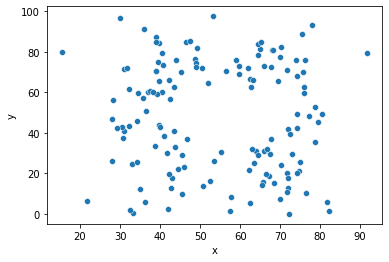

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


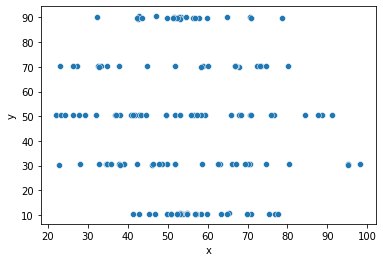

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


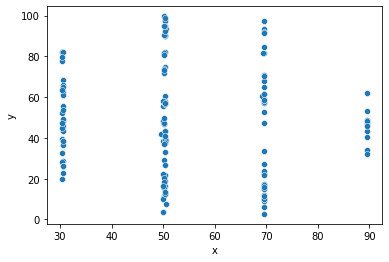

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


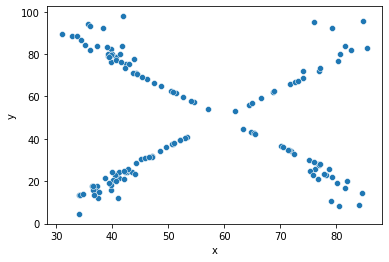

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


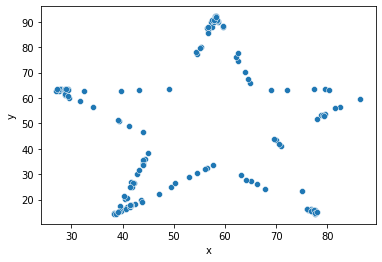

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


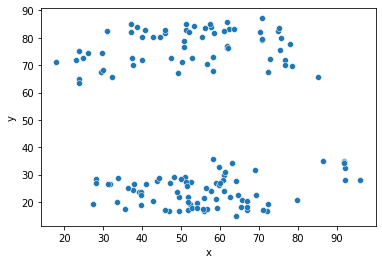

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


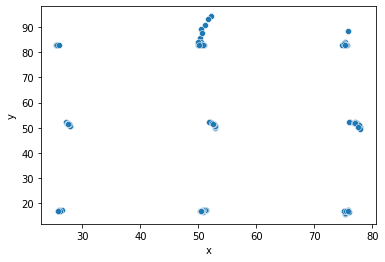

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


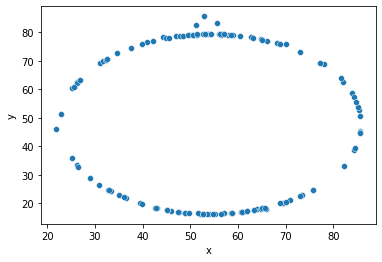

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


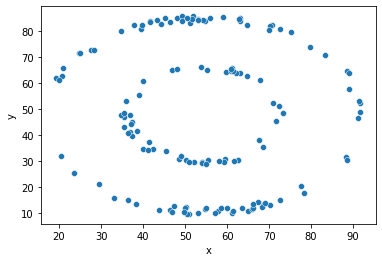

In [ ]:
import matplotlib.pyplot as plt
for i in range(0, 10):
  df = pd.read_csv(f'https://jpbarddal.github.io/assets/data/datascience/ans/dataset{i}.csv')
  sns.scatterplot(df['x'], df['y'])
  plt.show()